# Welcome to Jupyter!

Modèle SEIR


In [31]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.integrate
from scipy.optimize import fsolve


\begin{cases}
\displaystyle
\frac{dS(t)}{dt} &=& -\beta S(t)I(t)\\
\displaystyle
{\color{blue}{\frac{dE(t)}{dt}}} &=& \beta S(t)I(t){\color{blue}{-\alpha E(t)}}\\
\displaystyle
\frac{dI(t)}{dt} &=& {\color{blue}{\alpha E(t)}}-\gamma I(t)\\
\displaystyle
\frac{dR(t)}{dt} &=& \gamma I(t)
\end{cases}

In [32]:
N =1 #Population total
T=100 #Temps total
#Conditions initiales
I0, E0 ,R0= 0.6,0.1, 0.1
S0 = N - I0 - R0 -E0
P=100 
#Variables 
beta=0.2 #Taux de transmission
alpha=0.3 #Taux de contamination 
gamma = 0.4  #Taux de guérisson

t=[i*T/P for i in range(P+1)]


# The SIR model differential equations.
def f(y,t):
    S, E, I, R, = y
    N = S + E + I + R
    dSdt = -beta*S*I
    dEdt = beta*S*I - alpha*E
    dIdt = alpha*E - gamma*I 
    dRdt = gamma*I 
    return [dSdt, dEdt, dIdt, dRdt]

Nous avons initialisé notre fonction f. 
Cette fonction résout le système d'équations différentiels du modèle SEIR. 

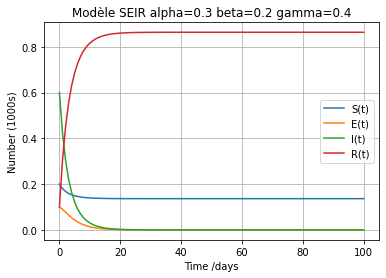

In [33]:
y0 = [S0,E0, I0, R0]
sol=scipy.integrate.odeint(f,y0,t)

plt.plot(t,sol)
plt.xlabel('Time /days')
plt.ylabel('Number (1000s)')
plt.grid()
plt.title('Modèle SEIR alpha={} beta={} gamma={}'.format(alpha,beta,gamma))
plt.legend(['S(t)','E(t)','I(t)','R(t)'])
plt.show()


Sur le graphique, nous pouvons observer que toute une partie de la population ne va pas être infecter pendant l'épidémie. 

On sais que la matrice Jacobienne est sous la forme comme:

$$J_f(\bar{u})=\begin{pmatrix}
\frac{\partial f_1}{\partial S}(\bar{S},\bar{E},\bar{I},\bar{R}) & \frac{\partial f_1}{\partial E}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_1}{\partial I}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_1}{\partial R}(\bar{S},\bar{E},\bar{I},\bar{R})\\ 
\frac{\partial f_2}{\partial S}(\bar{S},\bar{E},\bar{I},\bar{R}) & \frac{\partial f_2}{\partial E}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_2}{\partial I}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_2}{\partial R}(\bar{S},\bar{E},\bar{I},\bar{R})\\ 
\frac{\partial f_3}{\partial S}(\bar{S},\bar{E},\bar{I},\bar{R}) & \frac{\partial f_3}{\partial E}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_3}{\partial I}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_3}{\partial R}(\bar{S},\bar{E},\bar{I},\bar{R})\\ 
\frac{\partial f_4}{\partial S}(\bar{S},\bar{E},\bar{I},\bar{R}) & \frac{\partial f_4}{\partial E}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_4}{\partial I}(\bar{S},\bar{E},\bar{I},\bar{R}) &\frac{\partial f_4}{\partial R}(\bar{S},\bar{E},\bar{I},\bar{R})\\ 
\end{pmatrix}$$

Voici la matrice Jacobienne que nous obtenons.

$$=\begin{pmatrix}
-\beta \bar{I} & 0 & -\beta \bar{S} & 0\\ 
\beta \bar{I} & -\alpha  & \beta \bar{S} & 0\\ 
0 & \alpha & -\gamma & 0\\
0 & 0 & \gamma & 0\\
\end{pmatrix}$$

Le premier cas :$$\bar{S}=1.0\quad\bar{E}=0.0\quad\bar{I}=0.0\quad \bar{R}=0.0$$
(Il n'y a pas de personne infectée)

In [34]:
y0=[1,0,0,0]
sol_valeur=fsolve(f,y0,t)
print('S,E,I,R =',sol_valeur)


S,E,I,R = [1. 0. 0. 0.]


In [35]:
Jf=[[0,0,-beta,0],[0,-alpha,beta,0],[0,alpha,-gamma,0],[0,0,gamma,0]]
Jf=np.array(Jf)
S=np.linalg.eig(Jf)
print(type(S))
print('Les valeurs propres de la matrice Jacobienne sont \n',S[0])

<class 'tuple'>
Les valeurs propres de la matrice Jacobienne sont 
 [ 0.   0.  -0.6 -0.1]


Les valeurs propres de la matrice Jacobienne sont toutes négatives, donc la fonction est stable.

Le deuxième cas :$$\bar{S}=0.2\quad\bar{E}=0.4\quad\bar{I}=0.4\quad \bar{R}=0.0$$

In [36]:
y0=[0.2,0.4,0.4,0.0]
sol_valeur=fsolve(f,y0,t)
print('S,E,I,R =',sol_valeur)

S,E,I,R = [ 9.13838632e-01  1.89627743e-19 -1.58044831e-25 -3.70689118e+01]


In [37]:
Jf=[[0,0,0,0],[0,-alpha,0,0],[0,alpha,-gamma,0],[0,0,gamma,0]]
Jf=np.array(Jf)
S=np.linalg.eig(Jf)
print(type(S))
print('Les valeurs propres de la matrice Jacobienne sont \n',S[0])

<class 'tuple'>
Les valeurs propres de la matrice Jacobienne sont 
 [ 0.   0.  -0.4 -0.3]


Les valeurs propres de la matrice Jacobienne sont toutes négatives, donc la fonction est stable.
